# Otimizador de Rotas

### Importações

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

### Função para Criar Mapa

In [53]:
def criar_mapa():
    G = nx.Graph()

    conexoes = [
    ("Centro", "Jardins", 5),
    ("Centro", "Vila Nova", 8),
    ("Centro", "Liberdade", 3),
    ("Jardins", "Moema", 7),
    ("Jardins", "Pinheiros", 4),
    ("Vila Nova", "Santana", 6),
    ("Santana", "Barra Funda", 9),
    ("Moema", "Ipiranga", 5),
    ("Moema", "Brooklin", 6),
    ("Liberdade", "Ipiranga", 4),
    ("Barra Funda", "Lapa", 5),
    ("Ipiranga", "Tatuapé", 7),
    ("Butantã", "Pinheiros", 3),
    ("Brooklin", "Bela Vista", 4),
    ("Lapa", "Tatuapé", 6),
    ("Bela Vista", "Pinheiros", 5),
    ("Bela Vista", "Centro", 4),
    ("Tatuapé", "Alphaville", 10),
    ("Butantã", "Alphaville", 7),
    ("Alphaville", "Santana", 8),
    ("Brooklin", "Centro", 10),
    ("Pinheiros", "Lapa", 14),
    ("Vila Nova", "Tatuapé", 9),
    ("Jardins", "Ipiranga", 5),
    ("Jardins", "Lapa", 3),
    ("Alphaville", "Ipiranga", 3),
    ("Centro", "Lapa", 11),
    ("Vila Nova", "Bela Vista", 11),
    ("Barra Funda", "Bela Vista", 12),
    ("Alphaville", "Vila Nova", 2),
    ("Ipiranga", "Santana", 2),
    ("Brooklin", "Lapa", 14),
    ("Barra Funda", "Ipiranga", 14),
    ("Butantã", "Santana", 3),
    ("Centro", "Ipiranga", 15),
    ("Centro", "Santana", 15),
    ("Liberdade", "Jardins", 8),
    ("Moema", "Tatuapé", 3),
    ("Liberdade", "Santana", 15),
    ("Liberdade", "Pinheiros", 7),
    ("Tatuapé", "Jardins", 12),
    ("Pinheiros", "Santana", 10),
    ("Moema", "Alphaville", 6),
    ("Butantã", "Moema", 13),
    ("Liberdade", "Moema", 10),
    ("Barra Funda", "Pinheiros", 7),
    ("Lapa", "Vila Nova", 11),
    ("Moema", "Vila Nova", 10),
    ("Lapa", "Moema", 6),
    ("Jardins", "Santana", 14),
    ("Tatuapé", "Pinheiros", 2),
    ("Jardins", "Bela Vista", 6),
    ("Alphaville", "Pinheiros", 15),
    ("Brooklin", "Tatuapé", 1),
    ("Bela Vista", "Butantã", 9),
    ("Barra Funda", "Vila Nova", 3),
    ("Barra Funda", "Centro", 13),
    ("Vila Nova", "Butantã", 13),
    ("Lapa", "Ipiranga", 12),
    ("Liberdade", "Lapa", 3),
    ("Butantã", "Ipiranga", 5),
    ("Brooklin", "Vila Nova", 3),
    ("Butantã", "Lapa", 5),
    ("Centro", "Alphaville", 12),
    ("Bela Vista", "Tatuapé", 11),
    ("Liberdade", "Alphaville", 10),
    ("Centro", "Moema", 9),
    ("Tatuapé", "Centro", 10),
    ("Pinheiros", "Vila Nova", 3),
    ("Ipiranga", "Bela Vista", 1),
    ("Barra Funda", "Brooklin", 9),
    ("Tatuapé", "Santana", 14),
    ("Brooklin", "Jardins", 13),
    ("Alphaville", "Bela Vista", 14),
    ("Santana", "Bela Vista", 10),
    ("Brooklin", "Butantã", 3),
    ("Ipiranga", "Pinheiros", 11),
    ("Brooklin", "Pinheiros", 1),
    ("Alphaville", "Barra Funda", 7),
    ("Liberdade", "Barra Funda", 7)
    ]

    G.add_weighted_edges_from(conexoes)
    return G

### Plotar Mapa

In [66]:
def plotar_mapa(G):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(18, 16))

    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', edge_color='gray')

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title("Mapa de Rotas")
    plt.show()

### Encontra a Melhor Rota

In [67]:
def encontrar_melhor_rota(G, origem, destino):

    try:
        caminho = nx.shortest_path(G, source=origem, target=destino, weight='weight')

        distancia = nx.shortest_path_length(G, source=origem, target=destino, weight='weight')
        return caminho, distancia
    except nx.NetworkXNoPath:
        return None, None

### Plotar Rota

In [68]:
def plotar_rota(G, caminho):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(18, 16))

    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', edge_color='gray')

    if caminho:
        edges = [(caminho[i], caminho[i+1]) for i in range(len(caminho)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=3, edge_color='red')

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title("Melhor Rota Encontrada")
    plt.show()

### Execução

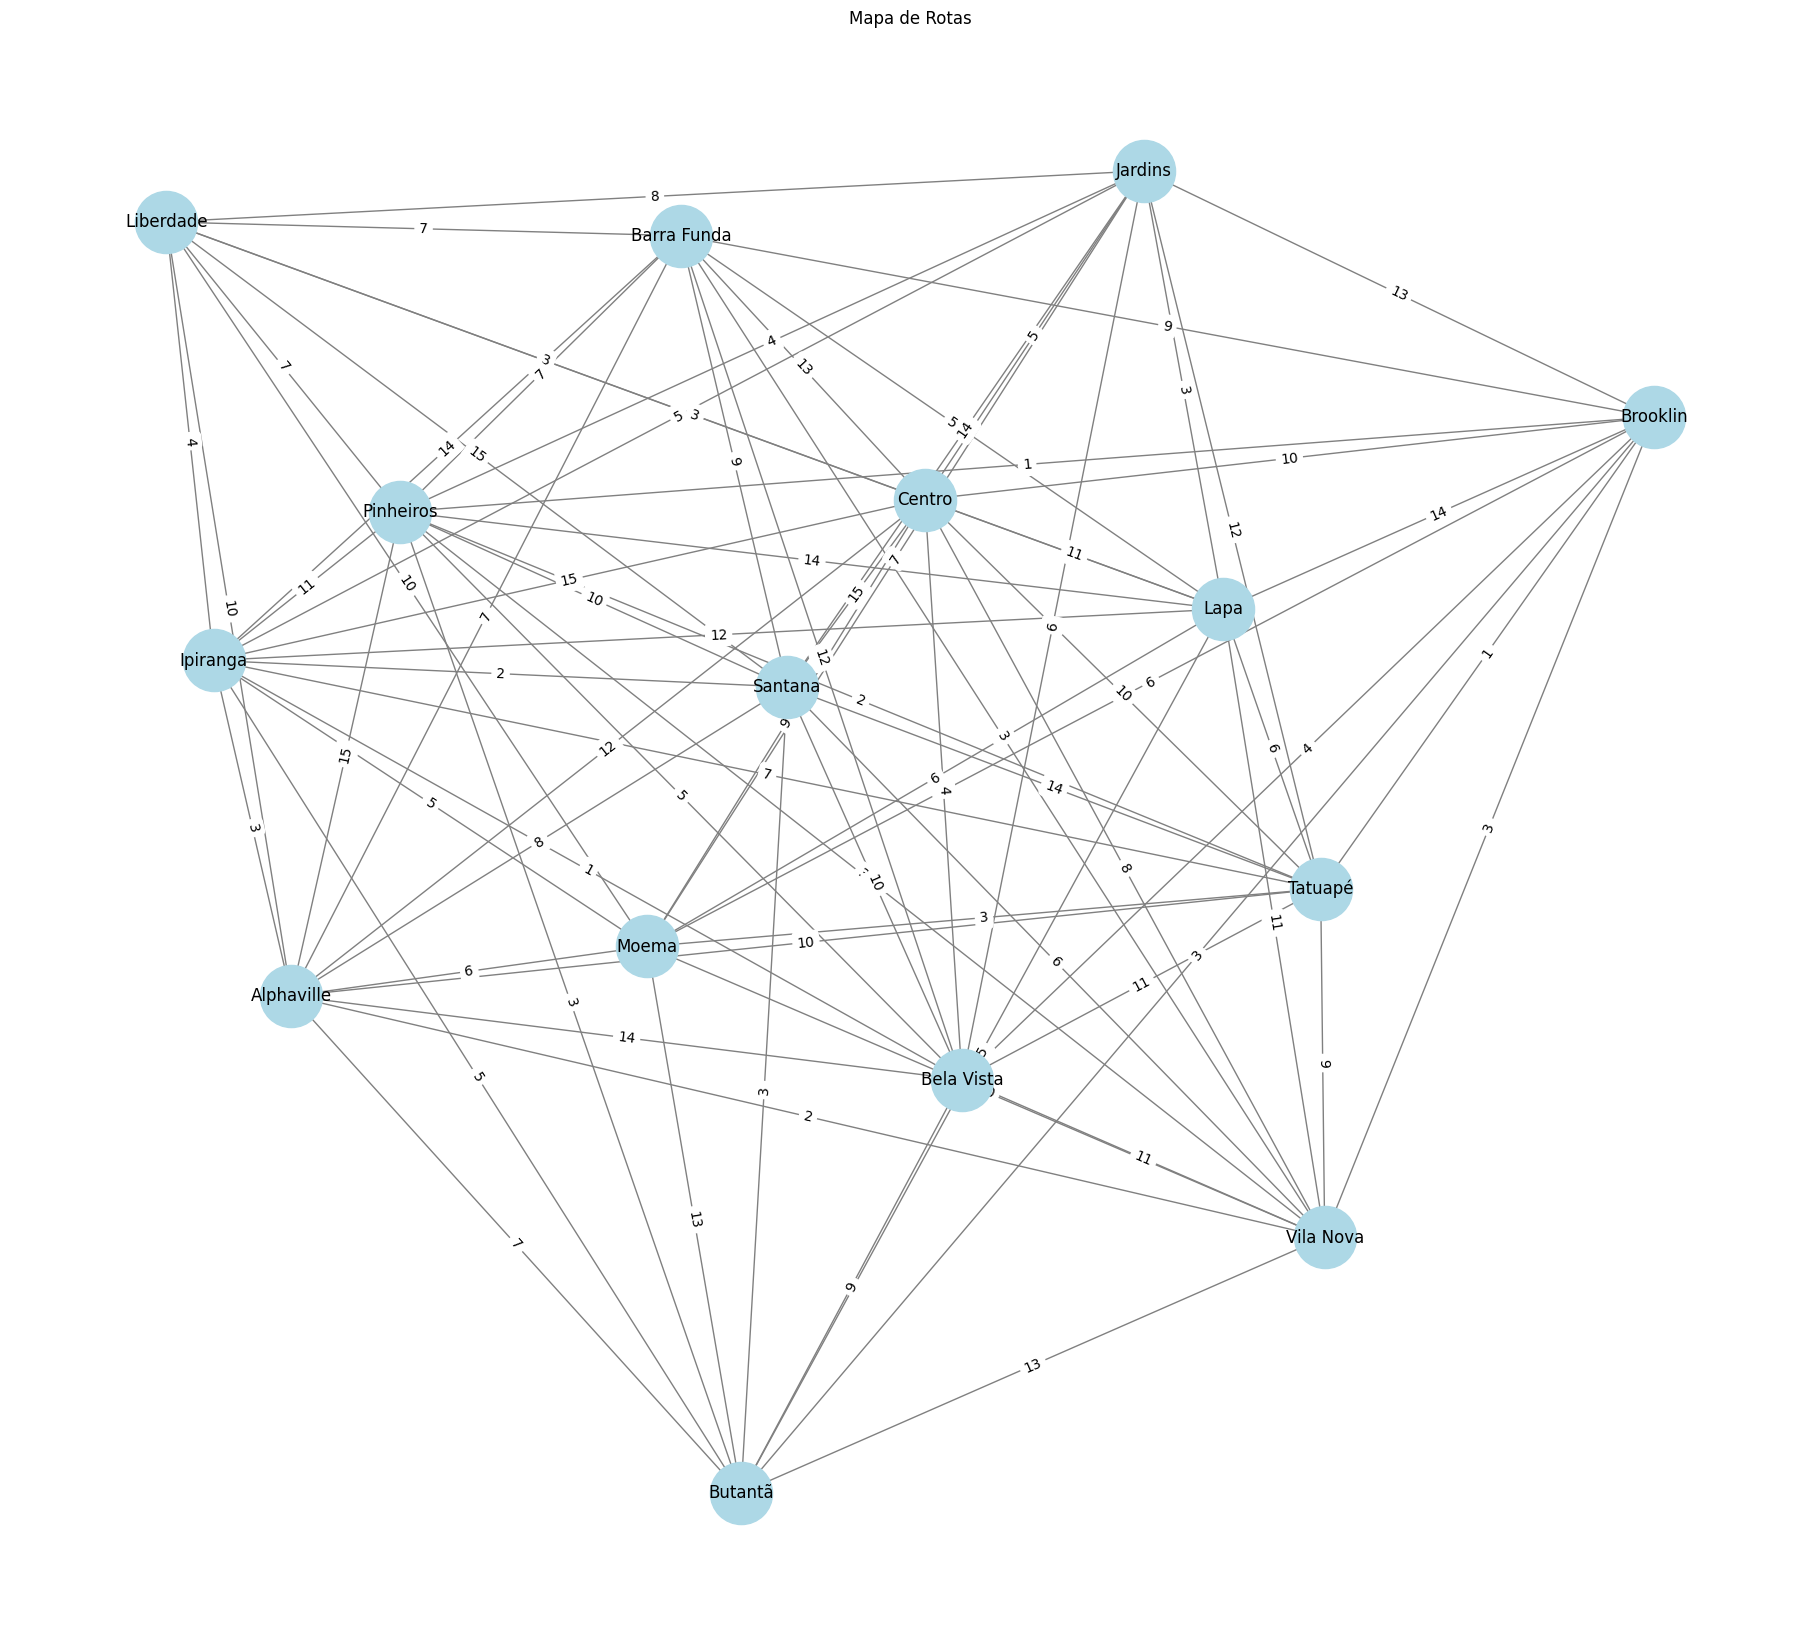

In [69]:
G = criar_mapa()
plotar_mapa(G)

In [79]:
origem = input("Digite a cidade de origem: ")
destino = input("Digite a cidade de destino: ")

Digite a cidade de origem: Liberdade
Digite a cidade de destino: Vila Nova


Melhor rota de Liberdade para Vila Nova: ['Liberdade', 'Ipiranga', 'Alphaville', 'Vila Nova'], Distância total: 9


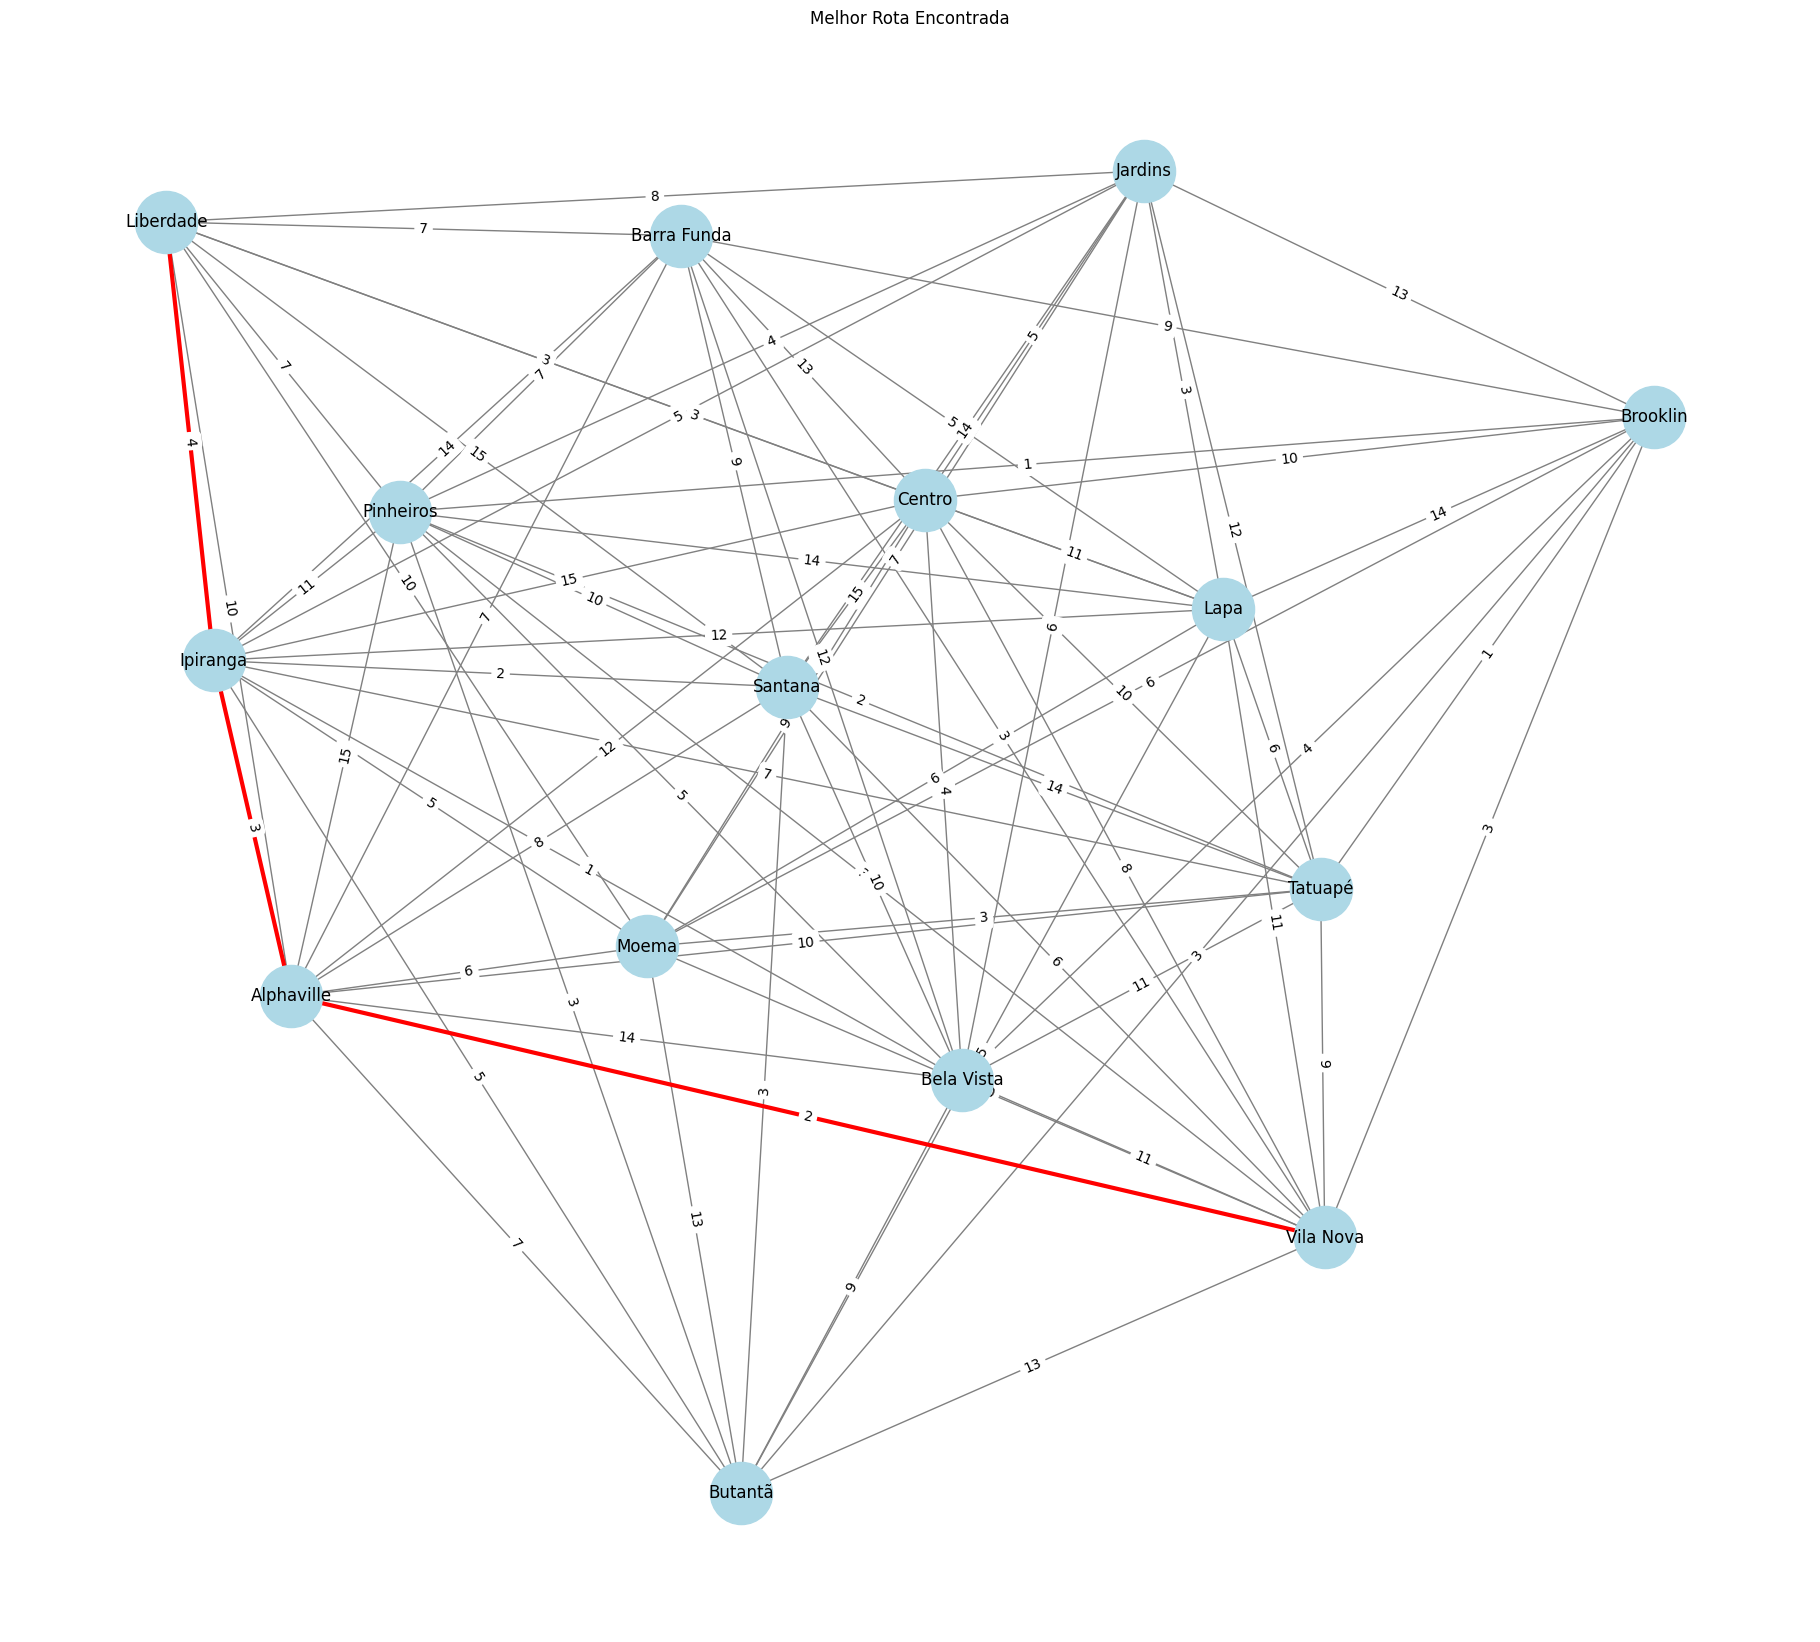

In [80]:
caminho, distancia = encontrar_melhor_rota(G, origem, destino)

if caminho:
    print(f"Melhor rota de {origem} para {destino}: {caminho}, Distância total: {distancia}")
    plotar_rota(G, caminho)
else:
    print("Não há caminho possível entre os pontos selecionados.")